# K-Nearest Neighbours Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table("fruit_data_with_colors.txt")
fruits = fruits.drop(columns = ["fruit_label","fruit_name","fruit_subtype"])
fruits.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


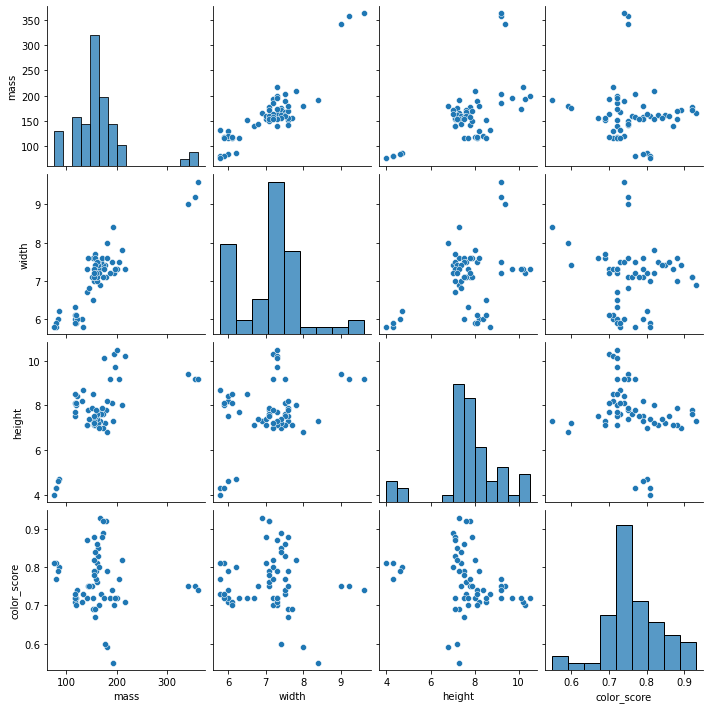

In [3]:
import seaborn as sns
sns.pairplot(fruits)

### Train - Test Split

In [4]:
X = fruits[['mass','width','height']]
y = fruits['color_score']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

### Create Classifier Object

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 5)

### Training the Classifier

In [6]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

### Testing the Classifier

In [7]:
# R^2
knn_reg.score(X_test, y_test)

-0.003260015710919051

In [8]:
# Test RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

test_preds = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.08253161010586592

## RMSE is the square root of MSE. MSE is measured in units that are the square of the target variable, while RMSE is measured in the same units as the target variable. Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.

### Choosing the value of K based on test RMSE

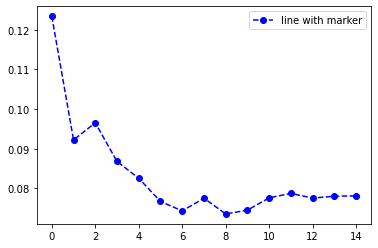

In [9]:
knn_test_rmse = []

k_range = range(1,16)
for k in k_range:
    
    knn_reg = KNeighborsRegressor(n_neighbors = k)
    knn_reg.fit(X_train, y_train)
    test_preds = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, test_preds)
    rmse = sqrt(mse)
    knn_test_rmse.append(rmse)

plt.plot(knn_test_rmse, '--bo', label='line with marker')
plt.legend()